In [96]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


rcParams['figure.figsize'] = (10,7)
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv('heart.csv')
df_copy = df.copy()

In [98]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [74]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Cheking NA or null values of our data set

In [75]:
df.isnull().sum() + df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### EDA

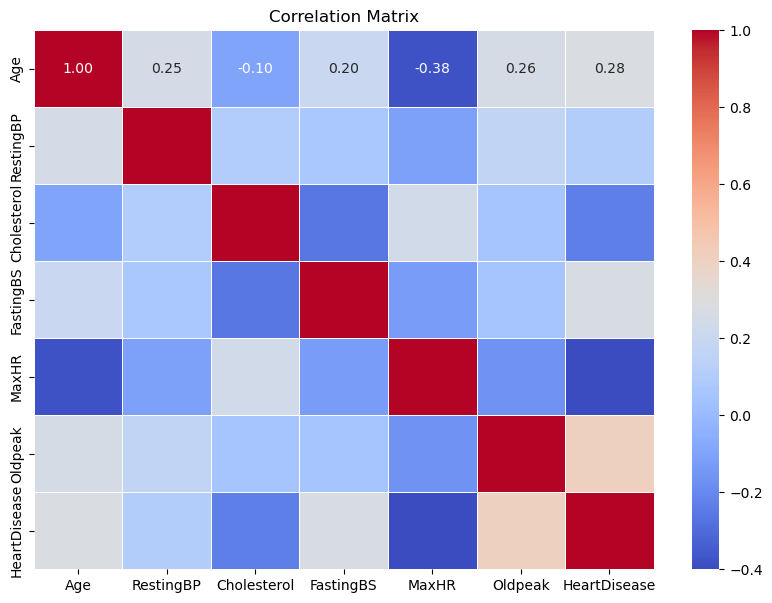

In [76]:
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Here are some insights derived from the correlation matrix:

- **Age & RestingBP**: There's a moderate positive correlation (0.25) between age and resting blood pressure (RestingBP), suggesting that as age increases, resting blood pressure tends to increase slightly.

- **Age & MaxHR**: Age has a moderate negative correlation (-0.38) with maximum heart rate (MaxHR), indicating that older individuals tend to have a lower maximum heart rate.

- **Age & Oldpeak**: Age has a moderate positive correlation (0.26) with ST depression induced by exercise relative to rest (Oldpeak), suggesting that older individuals might experience higher levels of ST depression during exercise.

- **RestingBP & Cholesterol**: There's a weak positive correlation (0.10) between resting blood pressure and cholesterol levels, implying a slight tendency for higher resting blood pressure to be associated with higher cholesterol levels.

- **FastingBS & HeartDisease**: Fasting blood sugar (FastingBS) has a moderate positive correlation (0.27) with the presence of heart disease (HeartDisease), suggesting a potential relationship between high fasting blood sugar levels and heart disease.

- **MaxHR & HeartDisease**: Maximum heart rate (MaxHR) has a moderate negative correlation (-0.40) with the presence of heart disease (HeartDisease), indicating that individuals with lower maximum heart rates may have a higher likelihood of heart disease.

- **Oldpeak & HeartDisease**: ST depression induced by exercise relative to rest (Oldpeak) has a moderate positive correlation (0.40) with the presence of heart disease (HeartDisease), suggesting that higher levels of ST depression may be associated with an increased risk of heart disease.


In [77]:
df.groupby(['HeartDisease', 'Sex']).size()

HeartDisease  Sex
0             F      143
              M      267
1             F       50
              M      458
dtype: int64

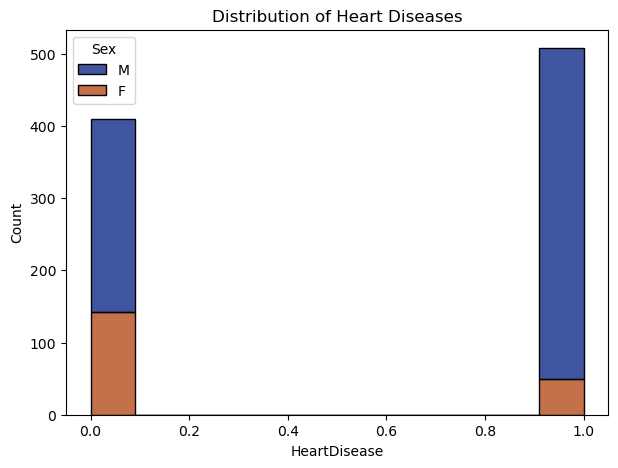

In [78]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='HeartDisease', hue='Sex', multiple='stack', palette='dark')
plt.title('Distribution of Heart Diseases')
plt.show()

Here are some insights derived from the grouped data:

- **Heart Disease by Gender**: Among individuals without heart disease (HeartDisease = 0), there are 143 females and 267 males, while among those with heart disease (HeartDisease = 1), there are 50 females and 458 males.

- **Gender Disparity in Heart Disease**: The data indicates a significant gender disparity in the prevalence of heart disease. While the number of males with heart disease is substantially higher than females, the difference is less pronounced among individuals without heart disease.

- **Potential Gender Bias in Diagnosis or Reporting**: The stark difference in the number of males and females with heart disease may suggest potential gender bias in either diagnosis or reporting of heart disease. Further investigation into healthcare access, diagnostic criteria, and reporting practices may be warranted to understand and address this disparity.


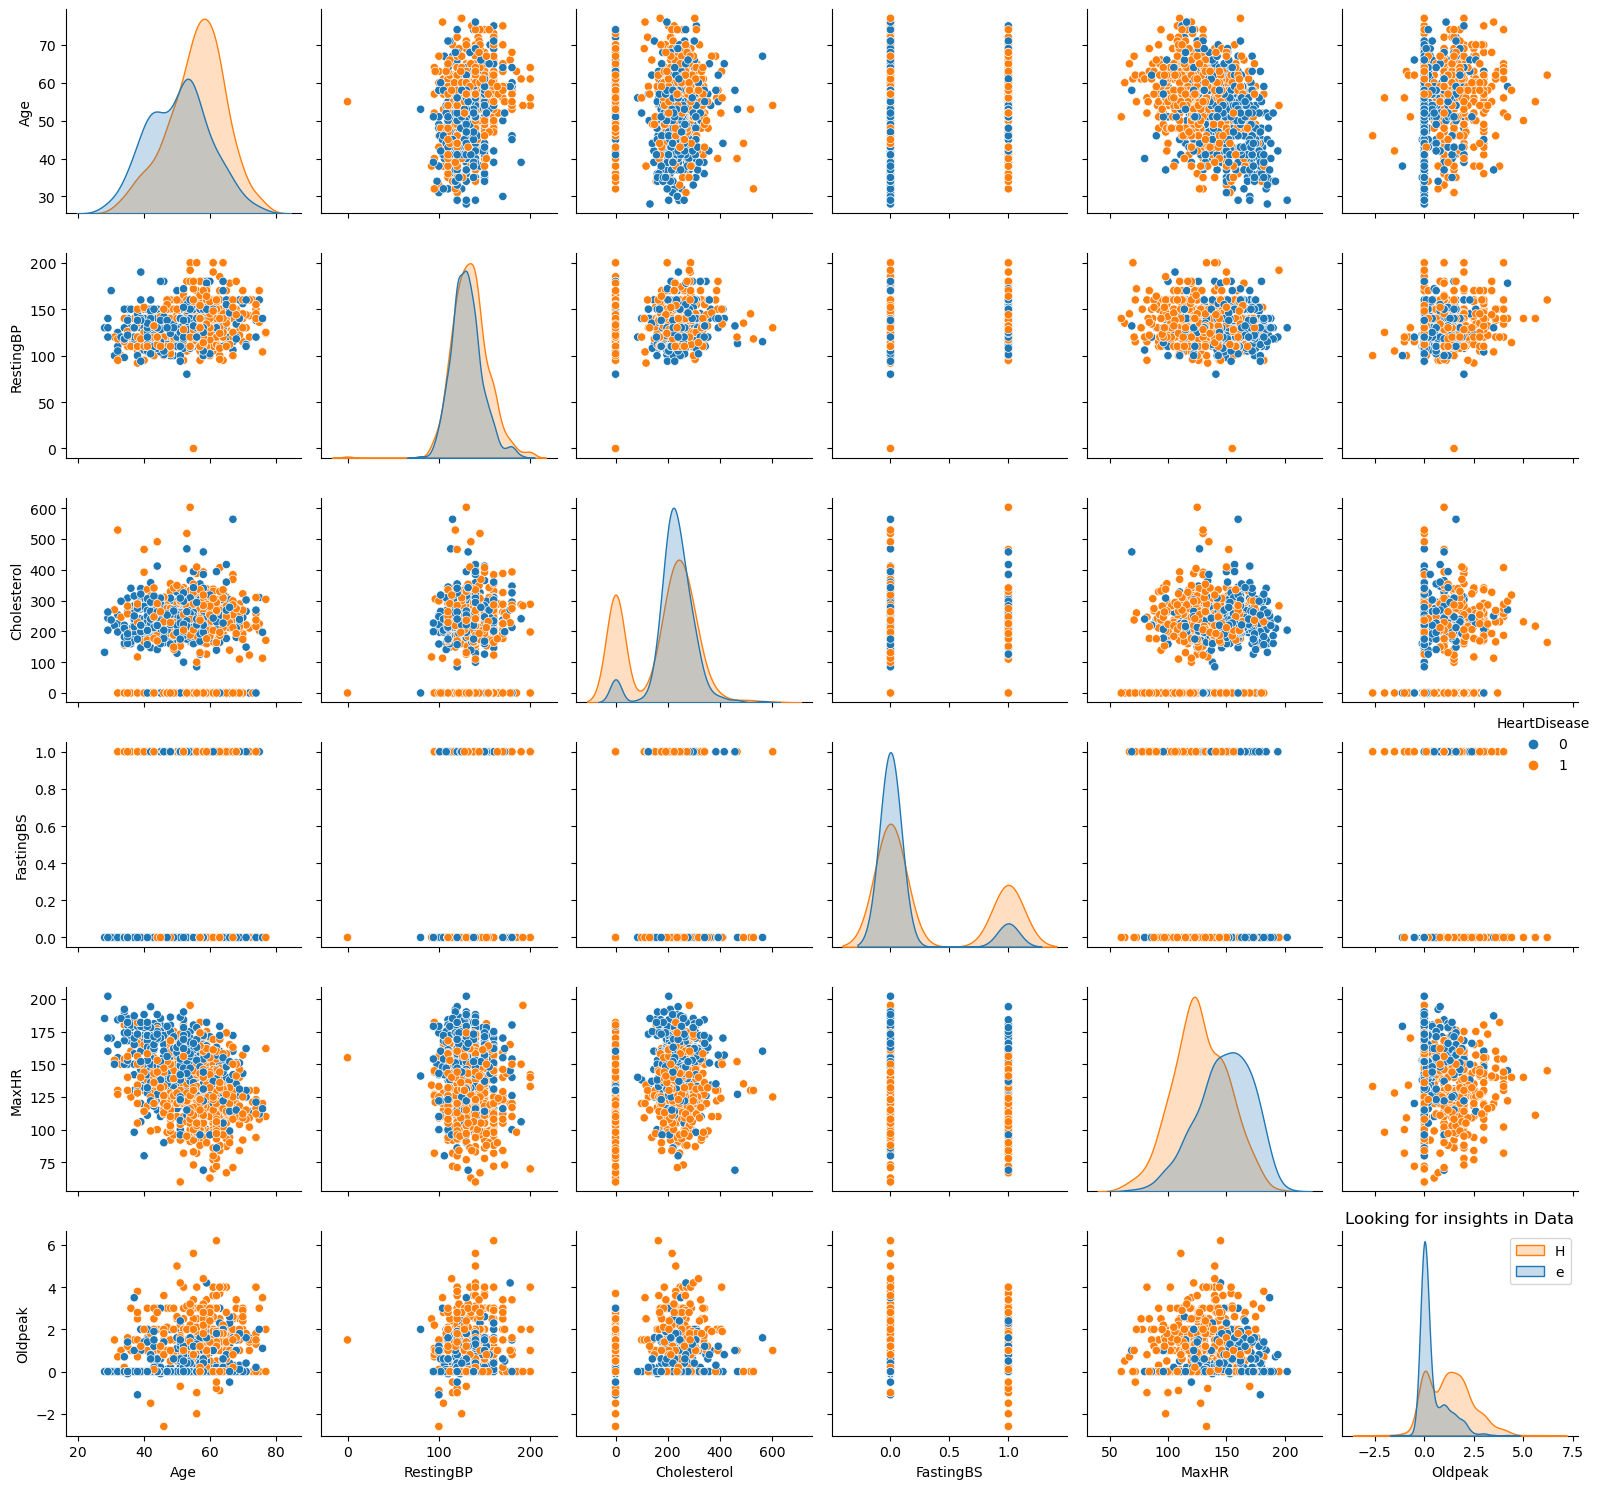

In [79]:
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for insights in Data")
plt.legend("HeartDisease")
plt.tight_layout()

### Performing One-Hot Encoding on following collumns
- ChestPainType
- RestingECG
- ExerciseAngina
- ST_Slope
- Sex (Gender)

In [80]:
def one_hot_encoding(data_frame,column_name, prefix_name):
    temp = pd.get_dummies(data_frame[column_name], prefix=prefix_name) * 1
    data_frame.drop(column_name, axis=1, inplace=True)
    return pd.concat([data_frame, temp], axis=1)

In [81]:
columns_to_perform_one_hot_encoding = {
    'ChestPainType': 'Cheest_Pain',
    'RestingECG': 'Resting_ECG',
    'ExerciseAngina': 'Exercise_Angina',
    'ST_Slope': 'ST_Slope',
    'Sex': 'Sex'
}
for key in columns_to_perform_one_hot_encoding:
    df = one_hot_encoding(df, key, columns_to_perform_one_hot_encoding[key])


### Applying Standardization technique on the following collumns
- Age
- RestingBP
- Cholesterol
- MaxHR
- Oldpeak

#### Since the scale of some columns are different, we need to apply Standardization technique to give equal importance to all the columns, other wise those columns will affect the model most because of their high scales

In [82]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

### Converting our pandas DataFrame to numpy series to perform the machine learning algorithms

In [83]:
y = df['HeartDisease'].values
X = df.drop('HeartDisease', axis=1).values

### Spliting our data set to train and test. Test siez will be 20% of whole data

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building Different classification Model to train our model
#### We are going to use the following models
- Logistic Regression
- SVM
- KNN
- Random Forest
- Naive Bayes

### Logistic Regression

In [85]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [86]:
logistic_regression_prediction = logistic_regression_model.predict(X_test)

### Finding accuracy of the model by feeding test data set that have splitied before (20% of whole data)

In [87]:
accuracy_of_logistic_regression_model = accuracy_score(y_test, logistic_regression_prediction)
report_of_logistic_regression_model = classification_report(y_test, logistic_regression_prediction)
print("Accuracy:", accuracy_of_logistic_regression_model)
print("Classification Report:\n", report_of_logistic_regression_model)

Accuracy: 0.8532608695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



```
Accuracy: 0.8532608695652174
Classification Report:
```
```
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184
```

- **Accuracy**: The overall accuracy of the model is approximately 85.33%. This indicates the proportion of correct predictions made by the model.

- **Classification Report**:
  - **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, the precision is 80%, meaning that 80% of the instances predicted as class 0 were actually class 0. For class 1, the precision is 90%, indicating that 90% of the instances predicted as class 1 were actually class 1.
  
  - **Recall**: Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all observations in actual class. For class 0, the recall is 87%, indicating that 87% of the actual instances of class 0 were correctly classified. For class 1, the recall is 84%, meaning that 84% of the actual instances of class 1 were correctly classified.
  
  - **F1-score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 83%, and for class 1, the F1-score is 87%.
  
  - **Support**: Support refers to the number of actual occurrences of the class in the specified dataset. For class 0, there are 77 instances, and for class 1, there are 107 instances.
  
- **Macro Average**: The macro average computes the metric independently for each class and then takes the average. Here, the macro average precision, recall, and F1-score are all approximately 85%.

- **Weighted Average**: The weighted average calculates the metric for each class, but with respect to the number of instances of each class. Here, the weighted average precision, recall, and F1-score are all approximately 85%, taking into account the class imbalance.


### SVM

In [88]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

In [89]:
svm_prediction = svm_model.predict(X_test)
accuracy_of_svm_model = accuracy_score(y_test, svm_prediction)
report_of_svm_model = classification_report(y_test, svm_prediction)
print("Accuracy:", accuracy_of_svm_model)
print("Classification Report:\n", report_of_svm_model)

Accuracy: 0.8641304347826086
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83        77
           1       0.87      0.90      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



### SVM Model Configuration

- **Kernel**: RBF (Radial Basis Function)
- **C Parameter**: 1.0
- **Gamma Parameter**: 'scale'

We chose the RBF kernel for its ability to capture non-linear relationships in the data effectively. The C parameter was set to 1.0, providing a balance between maximizing the margin and minimizing the classification error. The gamma parameter was set to 'scale' to automatically calculate its value based on the inverse of the number of features, ensuring better generalization.

### SVM Model Evaluation

- **Accuracy**: 86.41%
- **Classification Report**:

|      | Precision | Recall | F1-Score | Support |
|------|-----------|--------|----------|---------|
|   0  |   0.85    |  0.82  |   0.83   |    77   |
|   1  |   0.87    |  0.90  |   0.88   |   107   |
|------|-----------|--------|----------|---------|
|  Avg |   0.86    |  0.86  |   0.86   |   184   |

- **Interpretation**:

    - The overall accuracy of the SVM model is 86.41%, indicating that it correctly classified the majority of the instances in the test set.
    - For class 0 (negative class), the precision, recall, and F1-score are 85%, 82%, and 83% respectively. This suggests that the model performs reasonably well in identifying instances of class 0.
    - For class 1 (positive class), the precision, recall, and F1-score are 87%, 90%, and 88% respectively. This indicates that the model performs even better in identifying instances of class 1.
    - The macro-average and weighted-average metrics provide an overall assessment of the model's performance across both classes, which shows consistent and balanced performance.


### KNN

In [90]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)
print("Accuracy:", knn_accuracy)
print("Classification Report:\n", knn_report)

Accuracy: 0.8695652173913043
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



### KNN Model Configuration

- **Number of Neighbors (n_neighbors)**: 5

We chose to use the KNN algorithm with 5 nearest neighbors for classification. This means that when making predictions for new data points, the algorithm considers the labels of the 5 closest data points in the training set.

### KNN Model Evaluation

- **Accuracy**: 86.96%
- **Classification Report**:

|            | Precision | Recall | F1-Score | Support |
|------------|-----------|--------|----------|---------|
|      0     |    0.84   |  0.86  |   0.85   |    77   |
|      1     |    0.90   |  0.88  |   0.89   |   107   |
|------------|-----------|--------|----------|---------|
|  Accuracy  |           |        |   0.87   |   184   |
| Macro Avg  |    0.87   |  0.87  |   0.87   |   184   |
|Weighted Avg|    0.87   |  0.87  |   0.87   |   184   |

- **Interpretation**:

    - The overall accuracy of the KNN model is 86.96%, indicating that it correctly classified the majority of the instances in the test set.
    - For class 0 (negative class), the precision, recall, and F1-score are 84%, 86%, and 85% respectively. This suggests that the model performs reasonably well in identifying instances of class 0.
    - For class 1 (positive class), the precision, recall, and F1-score are 90%, 88%, and 89% respectively. This indicates that the model performs even better in identifying instances of class 1.
    - The macro-average and weighted-average metrics provide an overall assessment of the model's performance across both classes, which shows consistent and balanced performance.


### Random Forest

In [92]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
random_forest_prediction = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_prediction)
random_forest_report = classification_report(y_test, random_forest_prediction)
print("Accuracy:", random_forest_accuracy)
print("Classification Report:\n", random_forest_report)

Accuracy: 0.8858695652173914
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.91      0.90      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



### Random Forest Model Configuration

- **Number of Trees (n_estimators)**: 100
- **Random State**: 42

We configured the Random Forest model with 100 decision trees (`n_estimators=100`) and set the random state to 42 (`random_state=42`). Setting the random state ensures reproducibility of results across different runs of the model.

### Random Forest Model Evaluation

- **Accuracy**: 88.59%
- **Classification Report**:

|            | Precision | Recall | F1-Score | Support |
|------------|-----------|--------|----------|---------|
|      0     |    0.86   |  0.87  |   0.86   |    77   |
|      1     |    0.91   |  0.90  |   0.90   |   107   |
|------------|-----------|--------|----------|---------|
|  Accuracy  |           |        |   0.89   |   184   |
| Macro Avg  |    0.88   |  0.88  |   0.88   |   184   |
|Weighted Avg|    0.89   |  0.89  |   0.89   |   184   |

- **Interpretation**:

    - The Random Forest model achieved an accuracy of 88.59%, indicating that it correctly classified the majority of the instances in the test set.
    - For class 0 (negative class), the precision, recall, and F1-score are 86%, 87%, and 86% respectively. This suggests that the model performs reasonably well in identifying instances of class 0.
    - For class 1 (positive class), the precision, recall, and F1-score are 91%, 90%, and 90% respectively. This indicates that the model performs even better in identifying instances of class 1.
    - The macro-average and weighted-average metrics provide an overall assessment of the model's performance across both classes, which shows consistent and balanced performance.


### Naive Bayes

In [94]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [95]:
naive_bayes_prediction = naive_bayes_model.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_prediction)
naive_bayes_report = classification_report(y_test, naive_bayes_prediction)
print("Accuracy:", naive_bayes_accuracy)
print("Classification Report:\n", naive_bayes_report)

Accuracy: 0.8641304347826086
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        77
           1       0.93      0.83      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



### Naive Bayes Model Evaluation

- **Accuracy**: 86.41%
- **Classification Report**:

|            | Precision | Recall | F1-Score | Support |
|------------|-----------|--------|----------|---------|
|      0     |    0.80   |  0.91  |   0.85   |    77   |
|      1     |    0.93   |  0.83  |   0.88   |   107   |
|------------|-----------|--------|----------|---------|
|  Accuracy  |           |        |   0.86   |   184   |
| Macro Avg  |    0.86   |  0.87  |   0.86   |   184   |
|Weighted Avg|    0.87   |  0.86  |   0.86   |   184   |

### Interpretation:

- **Accuracy**: The Naive Bayes model achieved an accuracy of 86.41%, indicating that it correctly classified the majority of the instances in the test set.
  
- **Precision, Recall, and F1-Score**:
  - For class 0 (negative class), the precision (80%), recall (91%), and F1-score (85%) suggest that the model performs well in identifying instances of class 0. However, it has a slightly lower precision compared to class 1.
  - For class 1 (positive class), the precision (93%), recall (83%), and F1-score (88%) indicate that the model performs even better in identifying instances of class 1. It has higher precision but slightly lower recall compared to class 0.
  
- **Macro and Weighted Averages**: 
  - The macro-average and weighted-average metrics provide an overall assessment of the model's performance across both classes. The macro-average F1-score is 0.86, indicating a balanced performance across classes, while the weighted-average F1-score is also 0.86, suggesting that the model's performance is consistent across classes, considering their respective support.
